<a href="https://colab.research.google.com/github/Tahiana07/ML-Vortex/blob/main/Partie_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import kagglehub
import pandas as pd


# Download latest version
# Réponse question 1 - Chargement du notebook regression - California Housing.ipynb
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Mall_Customers.csv")
df.head()


Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
import sklearn
import pandas as pd

ds = sklearn.datasets.fetch_california_housing()

df = pd.DataFrame(ds.data, columns=ds.feature_names)
df['MedHouseVal'] = ds.target  # On ajoute la colonne cible (prix médian)

df.head()




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
# Réponse question 2 - Nettoyage et prétraitement
# Affichage du nombre de valeurs manquantes par colonne
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Après vérification, il n'y a aucune valeur manquante. On n'a pas besoin d'imputer ni de supprimer les données manquantes

In [31]:
# Vérification des types
print(df.dtypes)


MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


Chaque colonne a un typage correct.
En conclusion, on peut commencer à entrainer nos données car il n'y a pas de données manquantes ni de typages incorrects

In [32]:
# Réponse question 3 - EDA
# Statistique descriptive pour avoir une vue sur les données
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


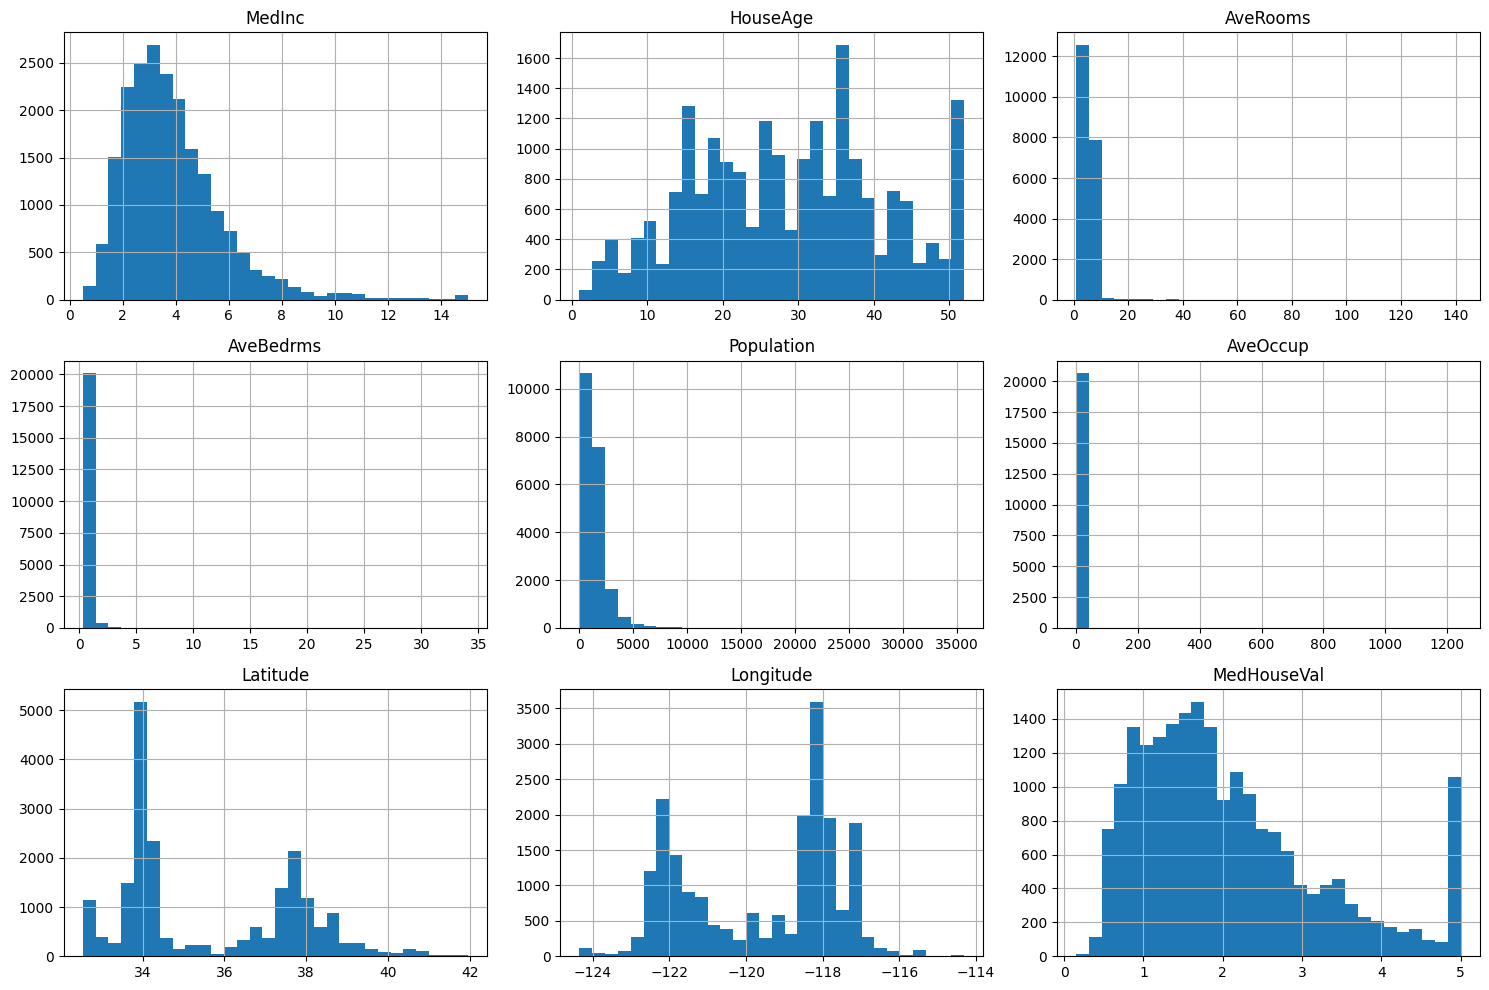

In [33]:
# Histogramme

import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


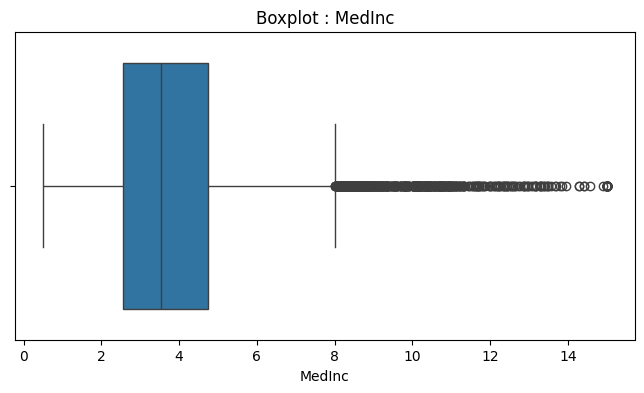

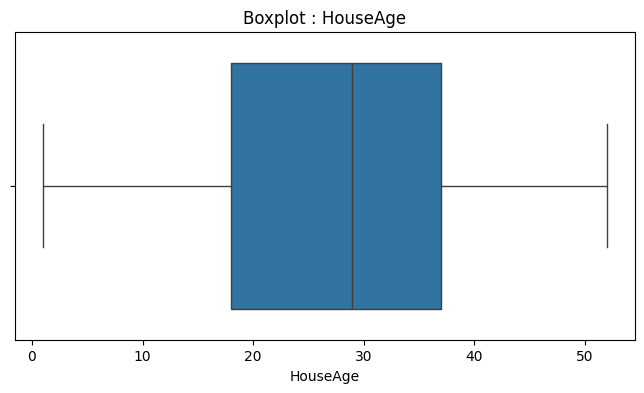

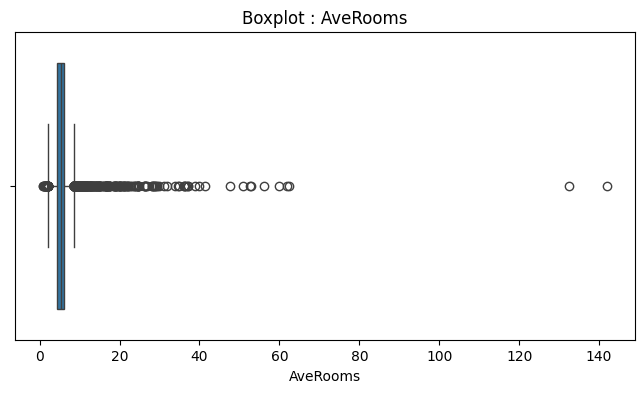

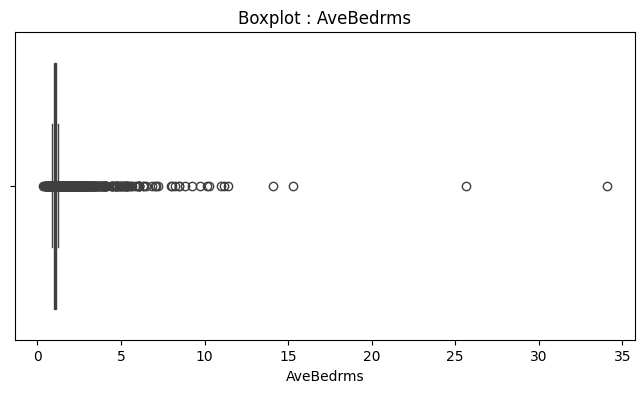

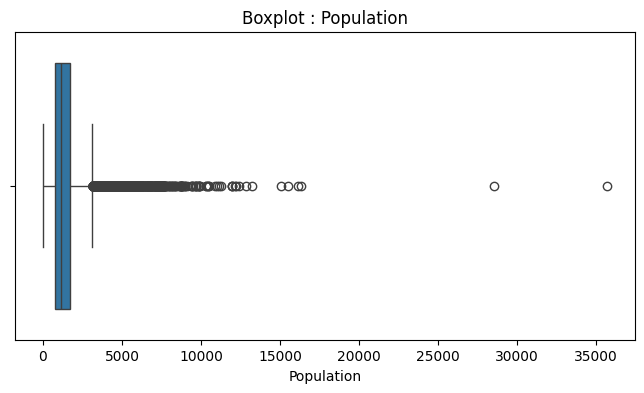

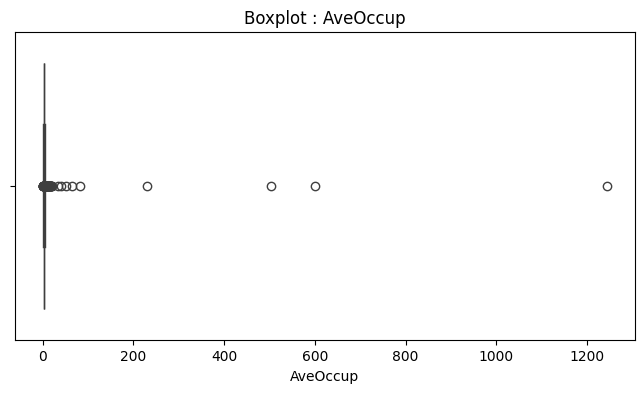

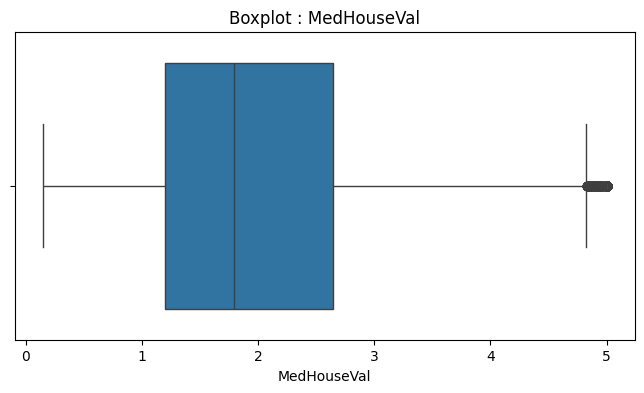

In [34]:
# BoxPlot
import seaborn as sns

# Fonction pour afficher les boxplots
def plot_boxplots(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot : {col}")
        plt.show()

colonnes_a_afficher = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"]
plot_boxplots(df, colonnes_a_afficher)

In [35]:
print(df.columns.tolist())


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


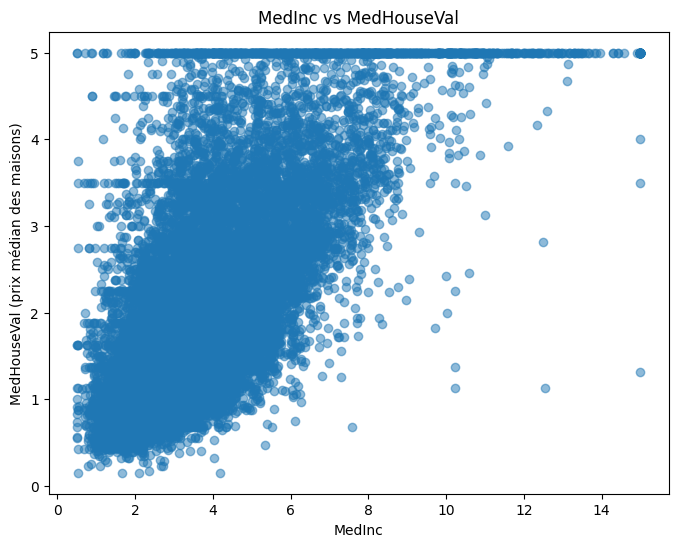

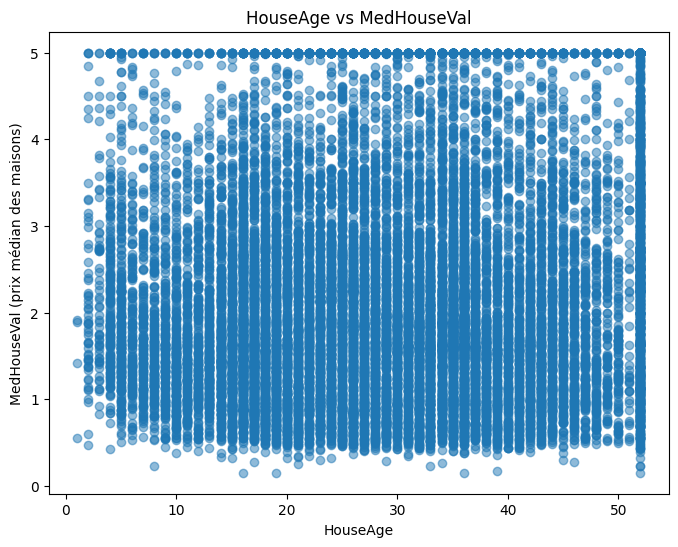

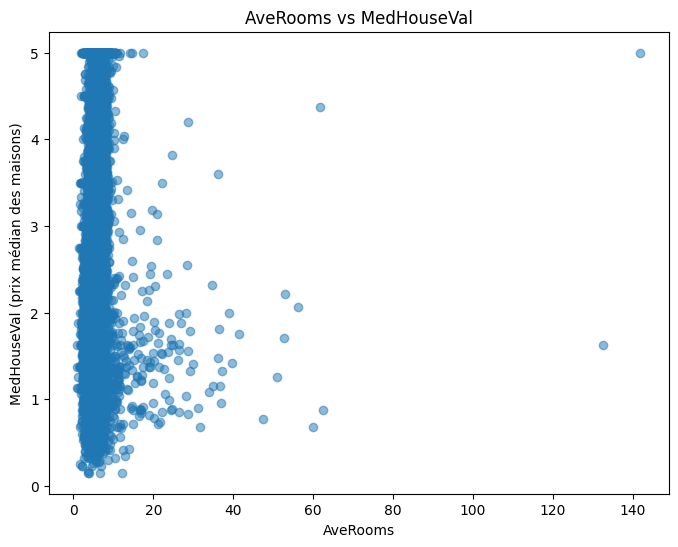

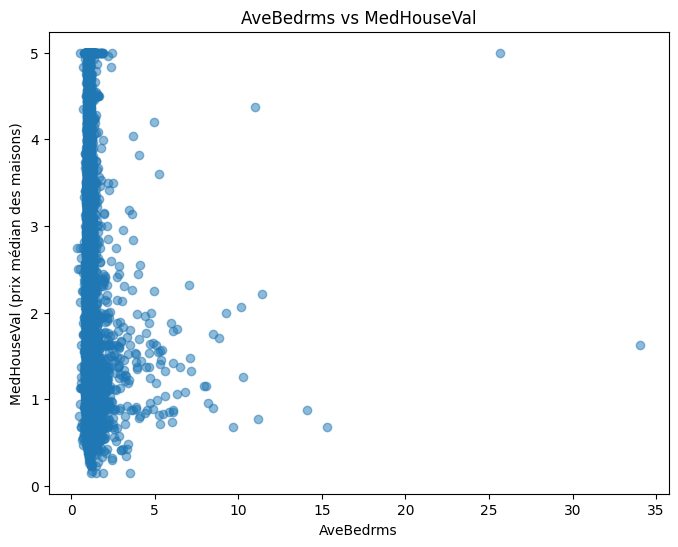

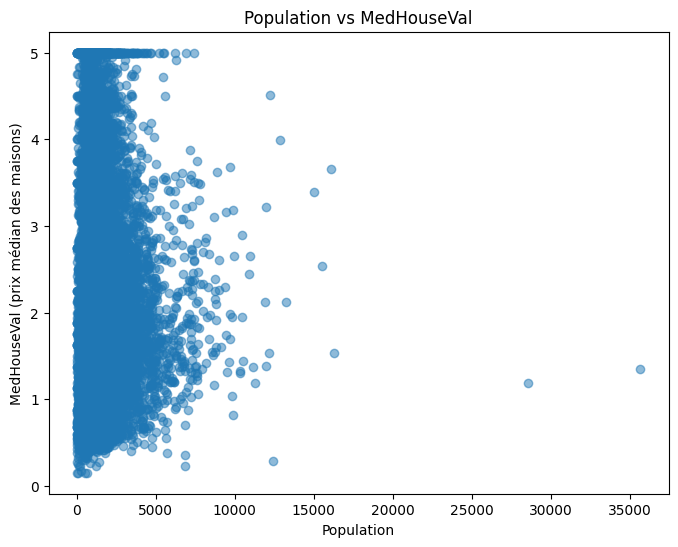

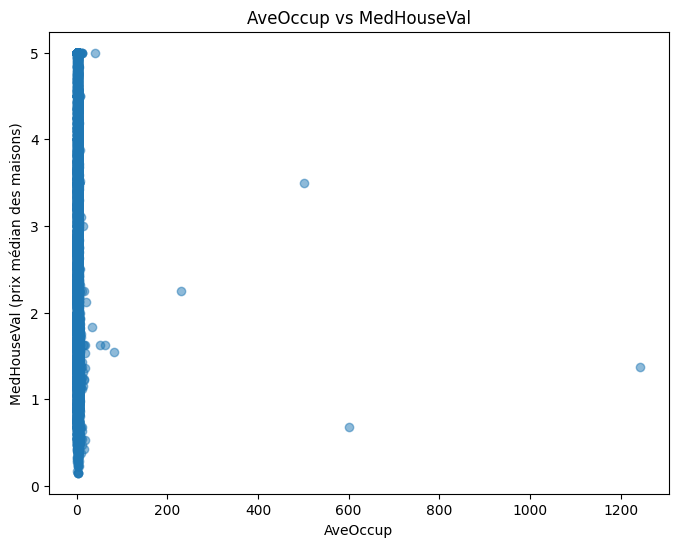

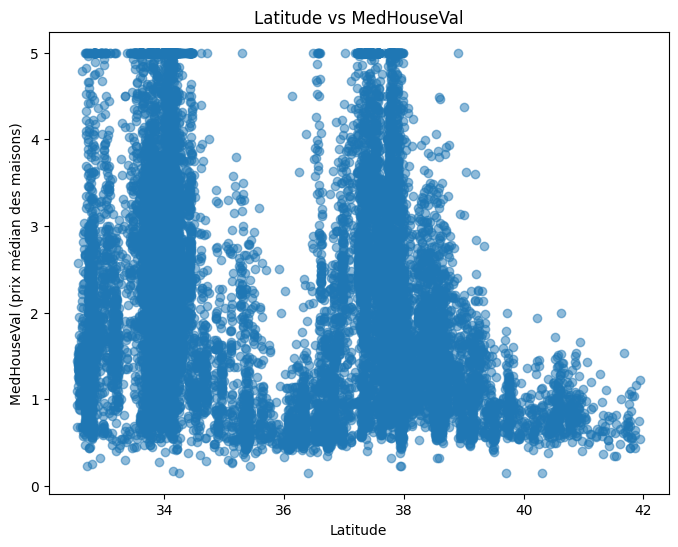

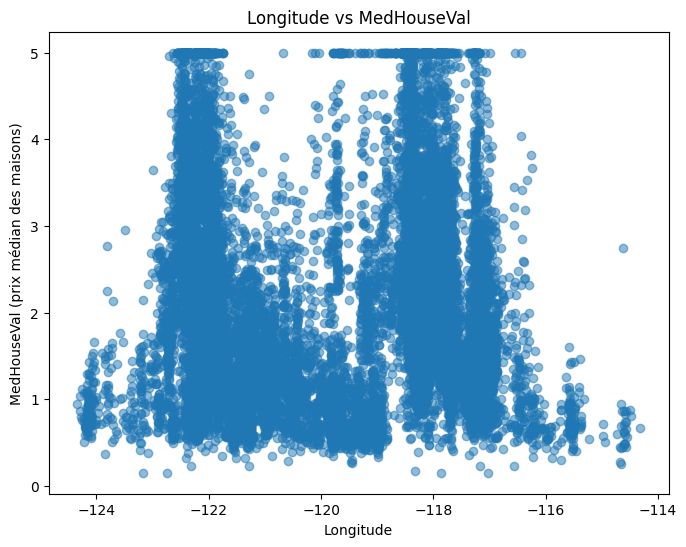

In [36]:
# scatter-plots prix vs variables clés
features = ds.feature_names
for feature in features:
    plt.figure(figsize=(8,6))
    plt.scatter(df[feature], df['MedHouseVal'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('MedHouseVal (prix médian des maisons)')
    plt.title(f'{feature} vs MedHouseVal')
    plt.show()

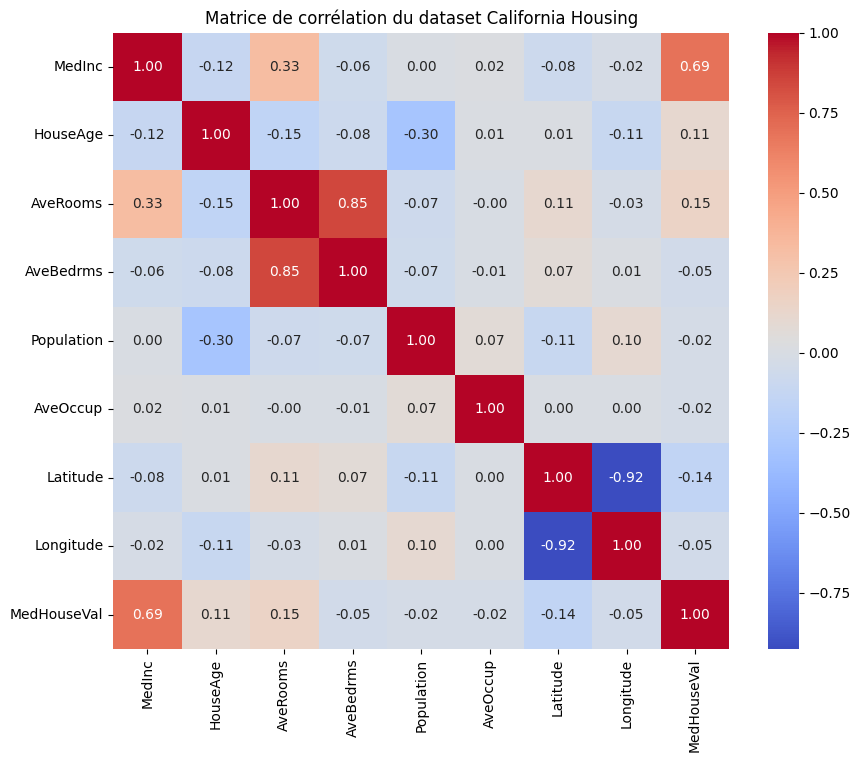

In [37]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Affichage de la matrice sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matrice de corrélation du dataset California Housing")
plt.show()

In [39]:
# Réponse question 4 - Split train/validation/test : 60% train, 20% validation, 20% test

from sklearn.model_selection import train_test_split

# Séparation features et target
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# 1 Split en train + temp (temporaire) (60% train, 40% restant)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# 2 Split temp en validation + test (50% val et 50% test du 40% restant -> 20% chacun)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Vérification des tailles
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Validation: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (12384, 8), (12384,)
Validation: (4128, 8), (4128,)
Test: (4128, 8), (4128,)


In [40]:
# Réponse question 5: Feature engineering / sélection : Normalisation (StandardScaler), encodage catégoriel

from sklearn.preprocessing import StandardScaler

# Features + target
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# Split en 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Vérification
print("Train shape:", X_train_scaled.shape)
print("Validation shape:", X_val_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Train shape: (12384, 8)
Validation shape: (4128, 8)
Test shape: (4128, 8)


In [41]:
# Réponse question 6: Baseline et modélisation initiale : Régression linéaire, rapporter MSE, MAE, R² sur le set de validation.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

# Chargement des données
ds = fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df['MedHouseVal'] = ds.target

# Features + cible
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# Split en 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prédictions sur validation
y_val_pred = model.predict(X_val_scaled)

# Évaluation
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE : {mse:.4f}")
print(f"Validation MAE : {mae:.4f}")
print(f"Validation R²  : {r2:.4f}")

Validation MSE : 0.5326
Validation MAE : 0.5336
Validation R²  : 0.5920


In [42]:
# Réponse question 7 - Régularisation : Ridge : pénalisation L2 pour la multicolinéarité et Lasso : pénalisation L1 pour la sélection de  features

from sklearn.linear_model import Ridge, Lasso

# Chargement des données
ds = fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df['MedHouseVal'] = ds.target

# Features + cible
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# Split 60/20/20
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_val_pred_ridge = ridge.predict(X_val_scaled)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_val_pred_lasso = lasso.predict(X_val_scaled)

# Évaluation Ridge
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
r2_ridge = r2_score(y_val, y_val_pred_ridge)

# Évaluation Lasso
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
mae_lasso = mean_absolute_error(y_val, y_val_pred_lasso)
r2_lasso = r2_score(y_val, y_val_pred_lasso)

# Affichage
print(" Ridge")
print(f"MSE  : {mse_ridge:.4f}")
print(f"MAE  : {mae_ridge:.4f}")
print(f"R²   : {r2_ridge:.4f}")

print("\n Lasso")
print(f"MSE  : {mse_lasso:.4f}")
print(f"MAE  : {mae_lasso:.4f}")
print(f"R²   : {r2_lasso:.4f}")

 Ridge
MSE  : 0.5326
MAE  : 0.5336
R²   : 0.5920

 Lasso
MSE  : 0.6824
MAE  : 0.6244
R²   : 0.4772


In [43]:
# Réponse question 8 - Évaluation finale : Application du meilleur modèle sur le test set, présentation de MSE, MAE, R² et intervalles
# de confiance

import numpy as np
from sklearn.utils import resample

# On suppose que le meilleur modèle était Ridge avec alpha=1.0
final_model = Ridge(alpha=1.0)
final_model.fit(X_train_scaled, y_train)

# Prédiction sur test
X_test_scaled = scaler.transform(X_test)
y_test_pred = final_model.predict(X_test_scaled)

# Métriques
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Évaluation finale sur le test set :")
print(f"MSE  : {mse_test:.4f}")
print(f"MAE  : {mae_test:.4f}")
print(f"R²   : {r2_test:.4f}")

# Intervalles de confiance via bootstrap
n_bootstraps = 1000
mse_samples = []
mae_samples = []
r2_samples = []

for _ in range(n_bootstraps):
    y_test_resampled, y_pred_resampled = resample(y_test, y_test_pred)
    mse_samples.append(mean_squared_error(y_test_resampled, y_pred_resampled))
    mae_samples.append(mean_absolute_error(y_test_resampled, y_pred_resampled))
    r2_samples.append(r2_score(y_test_resampled, y_pred_resampled))

# Calcul des intervalles (par exemple 95%)
mse_ci = np.percentile(mse_samples, [2.5, 97.5])
mae_ci = np.percentile(mae_samples, [2.5, 97.5])
r2_ci = np.percentile(r2_samples, [2.5, 97.5])

print("\n Intervalles de confiance (95%) :")
print(f"MSE 95% CI : {mse_ci[0]:.4f} - {mse_ci[1]:.4f}")
print(f"MAE 95% CI : {mae_ci[0]:.4f} - {mae_ci[1]:.4f}")
print(f"R²  95% CI : {r2_ci[0]:.4f} - {r2_ci[1]:.4f}")


Évaluation finale sur le test set :
MSE  : 0.5546
MAE  : 0.5337
R²   : 0.5955

 Intervalles de confiance (95%) :
MSE 95% CI : 0.5025 - 0.6227
MAE 95% CI : 0.5186 - 0.5488
R²  95% CI : 0.5487 - 0.6314


# Réponse question 9 - Interprétation de l’importance des variables

Les conclusions de cette analyse portent sur l'interprétation des variables influençant le prix médian des maisons et les pistes d'amélioration pour le modèle de régression.

**Interprétation de l'importance des variables:**

*   L'analyse exploratoire des données (EDA), notamment les boxplots, scatter plots et la matrice de corrélation, a permis d'identifier les variables les plus fortement corrélées avec la variable cible (MedHouseVal, le prix médian des maisons).
*   La variable MedInc (Revenu médian) montre généralement la corrélation la plus forte et la plus positive avec MedHouseVal. Cela indique que les quartiers avec un revenu médian plus élevé ont tendance à avoir des prix médians des maisons plus élevés.
*   D'autres variables comme HouseAge (Age médian des maisons), AveRooms (Nombre moyen de pièces) et potentiellement Population et AveOccup (Occupation moyenne) ont également montré des relations, même s'ils sont moins fortes ou plus complexes.
*   La régression linéaire et les modèles régularisés (Ridge et Lasso) estiment des coefficients pour chaque variable, reflétant leur contribution linéaire (positive ou négative) à la prédiction du prix médian des maisons. L'ampleur des coefficients (en particulier dans le cas du modèle Lasso qui peut réduire certains coefficients à zéro) peut donner une indication de l'importance relative des variables dans le modèle.

**Pistes d'amélioration:**

*   **Exploration de modèles plus complexes:** Les modèles linéaires (Régression Linéaire, Ridge, Lasso) supposent une relation linéaire entre les features et la cible. Si les relations sont non-linéaires, des modèles plus sophistiqués comme les arbres de décision, les forêts aléatoires, le Gradient Boosting (XGBoost, LightGBM) ou même des réseaux neuronaux pourraient améliorer les performances.
*   **Ingénierie de nouvelles features:** Créer de nouvelles variables à partir des variables existantes pourrait capturer des relations plus complexes. Par exemple, des ratios (AveBedrms / AveRooms) ou des interactions entre variables (MedInc * HouseAge).
*   **Optimisation des hyperparamètres:** Les modèles régularisés (Ridge, Lasso) ont des hyperparamètres (par exemple, alpha). Optimiser ces hyperparamètres à l'aide de techniques comme la validation croisée sur le set de validation pourrait améliorer la généralisation du modèle.
*   **Gestion des valeurs anormales:** Bien que l'analyse initiale n'ait pas montré de données manquantes, les boxplots ont révélé la présence de valeurs anormales dans certaines variables. Une analyse plus poussée de l'impact de ces valeurs anormales et l'application de techniques de gestion (filtrage, transformation) pourraient être bénéfiques.
*   **Analyse des résidus:** L'analyse des résidus (différence entre les valeurs prédites et réelles) du modèle final peut révéler des motifs ou des tendances non capturées par le modèle actuel, suggérant où les améliorations pourraient être nécessaires.
*   **Considérer d'autres techniques de régularisation:** Explorer d'autres formes de régularisation ou des combinaisons de régularisation si nécessaire.
*   **Validation croisée:** Utiliser la validation croisée (par exemple, K-Fold) sur le set d'entraînement peut donner une estimation plus robuste des performances du modèle avant l'évaluation finale sur le set de test.

En résumé, le revenu médian semble être un facteur clé dans la détermination du prix des maisons. Les pistes d'amélioration suggèrent d'explorer des modèles plus flexibles, d'affiner l'ingénierie des caractéristiques et d'optimiser les hyperparamètres pour mieux capturer les complexités des données et améliorer la précision des prédictions sur de nouvelles données.